In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Metro-Interstate-Traffic-Volume-Encoded.csv')

In [5]:
print("Shape of dataset:", df.shape)

Shape of dataset: (48204, 11)


In [6]:
print("Size of dataset:", df.size)

Size of dataset: 530244


In [45]:
df.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918


In [26]:
df.tail()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume,traffic_category
48199,7,283.45,0.0,0.0,2018,9,30,19,1,2,3543,1
48200,7,282.76,0.0,0.0,2018,9,30,20,1,19,2781,1
48201,7,282.73,0.0,0.0,2018,9,30,21,10,21,2159,0
48202,7,282.09,0.0,0.0,2018,9,30,22,1,19,1450,0
48203,7,282.12,0.0,0.0,2018,9,30,23,1,19,954,0


In [7]:
print("\nNull values:\n", df.isnull().sum())


Null values:
 holiday                0
temp                   0
rain_1h                0
snow_1h                0
Year                   0
Month                  0
Day                    0
Hour                   0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64


In [8]:
print("\nMean of columns:\n", df.mean(numeric_only=True))


Mean of columns:
 holiday                   6.997780
temp                    281.258909
rain_1h                   0.130851
snow_1h                   0.000222
Year                   2015.512426
Month                     6.506037
Day                      15.737636
Hour                     11.398162
weather_main              2.578375
weather_description      16.540536
traffic_volume         3259.818355
dtype: float64


In [9]:
print("\nMode of columns:\n", df.mode().iloc[0])


Mode of columns:
 holiday                   7.00
temp                    274.15
rain_1h                   0.00
snow_1h                   0.00
Year                   2017.00
Month                     7.00
Day                      19.00
Hour                      4.00
weather_main              1.00
weather_description      27.00
traffic_volume          353.00
Name: 0, dtype: float64


In [10]:
print("\nMedian of columns:\n", df.median(numeric_only=True))


Median of columns:
 holiday                   7.00
temp                    282.45
rain_1h                   0.00
snow_1h                   0.00
Year                   2016.00
Month                     7.00
Day                      16.00
Hour                     11.00
weather_main              1.00
weather_description      17.00
traffic_volume         3380.00
dtype: float64


In [11]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
             holiday          temp       rain_1h       snow_1h          Year  \
count  48204.000000  48204.000000  48204.000000  48204.000000  48204.000000   
mean       6.997780    281.258909      0.130851      0.000222   2015.512426   
std        0.139999     12.713613      1.010260      0.008168      1.893211   
min        0.000000    243.390000      0.000000      0.000000   2012.000000   
25%        7.000000    272.160000      0.000000      0.000000   2014.000000   
50%        7.000000    282.450000      0.000000      0.000000   2016.000000   
75%        7.000000    291.806000      0.000000      0.000000   2017.000000   
max       11.000000    310.070000     55.630000      0.510000   2018.000000   

              Month           Day          Hour  weather_main  \
count  48204.000000  48204.000000  48204.000000  48204.000000   
mean       6.506037     15.737636     11.398162      2.578375   
std        3.400221      8.722938      6.940238      2.784224   
min   

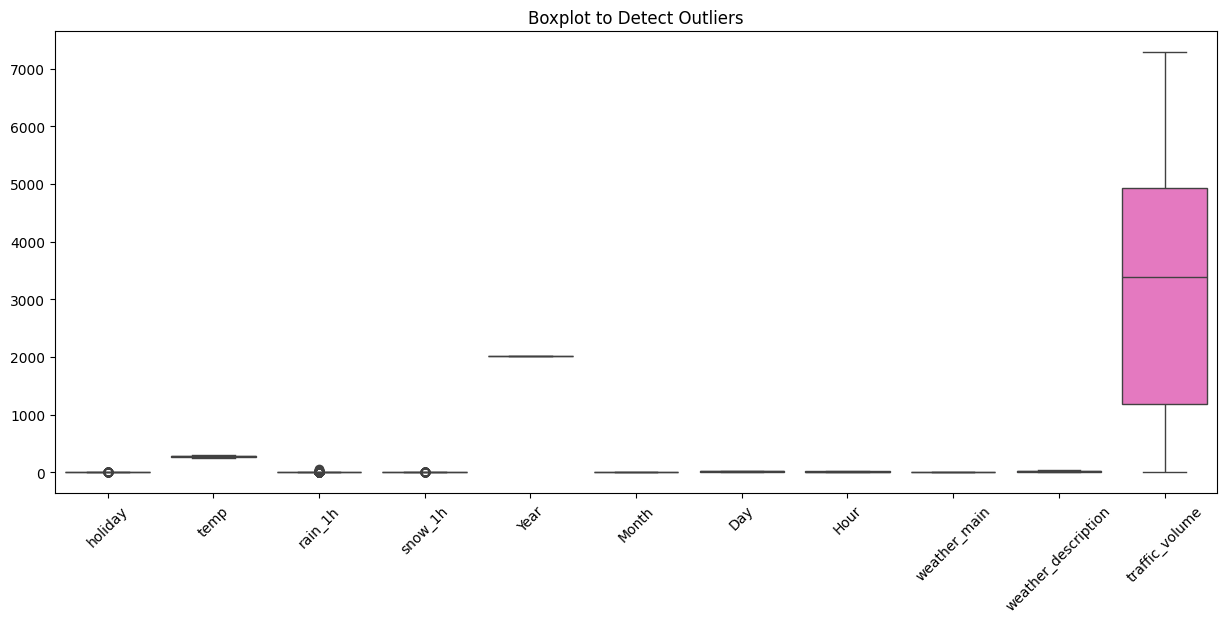

In [12]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

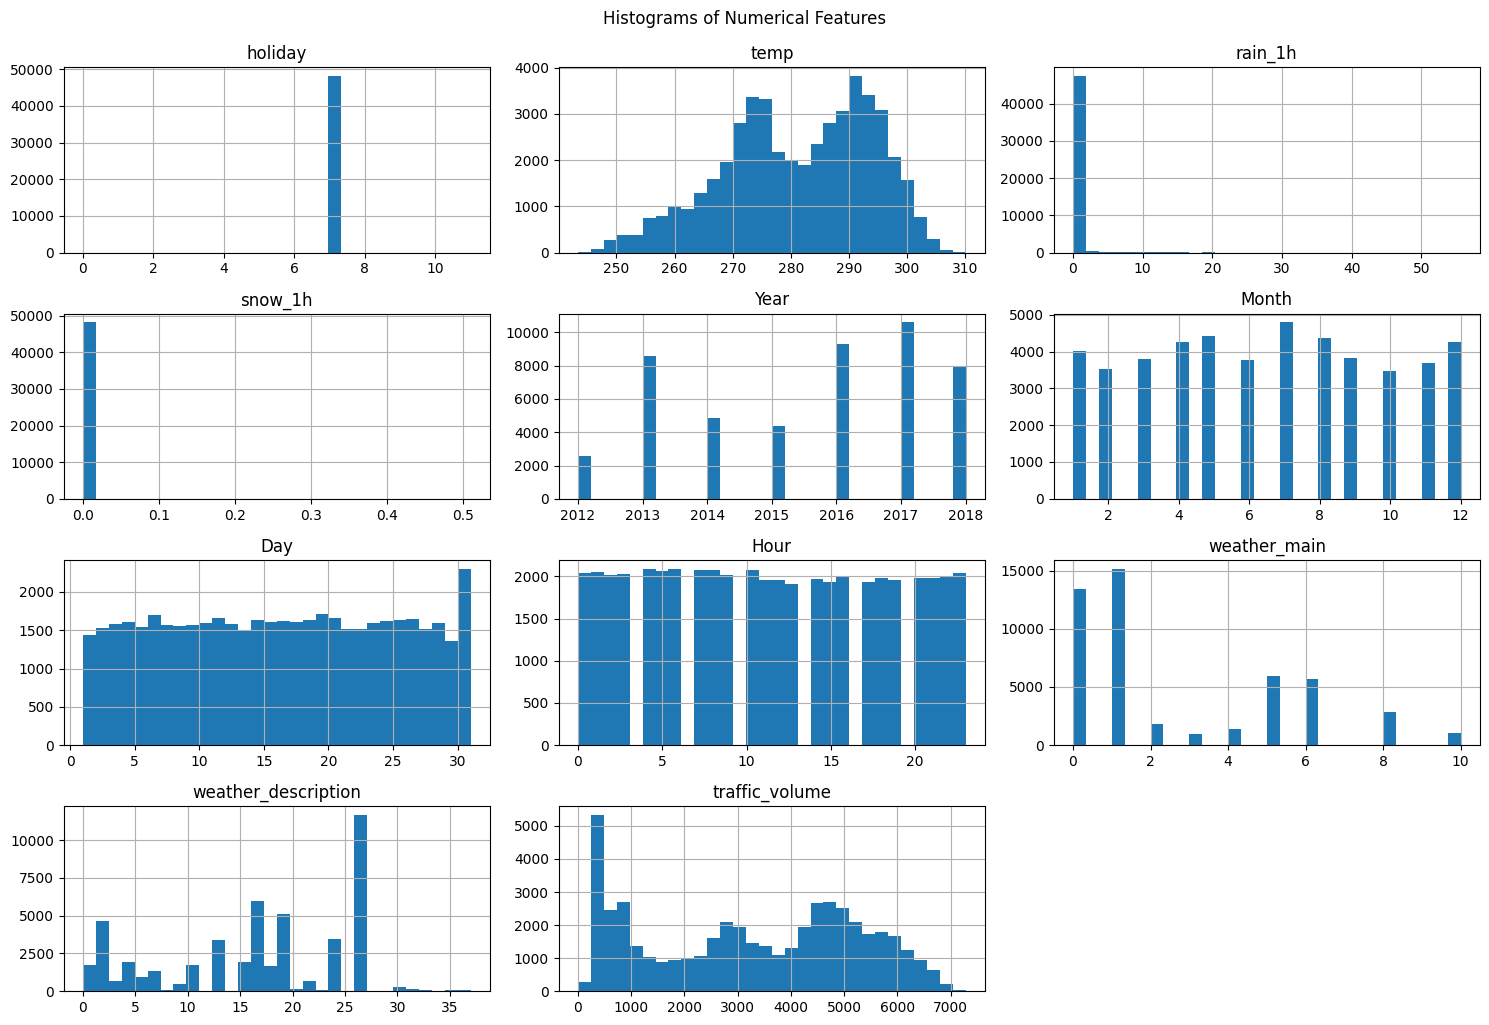

In [13]:

df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

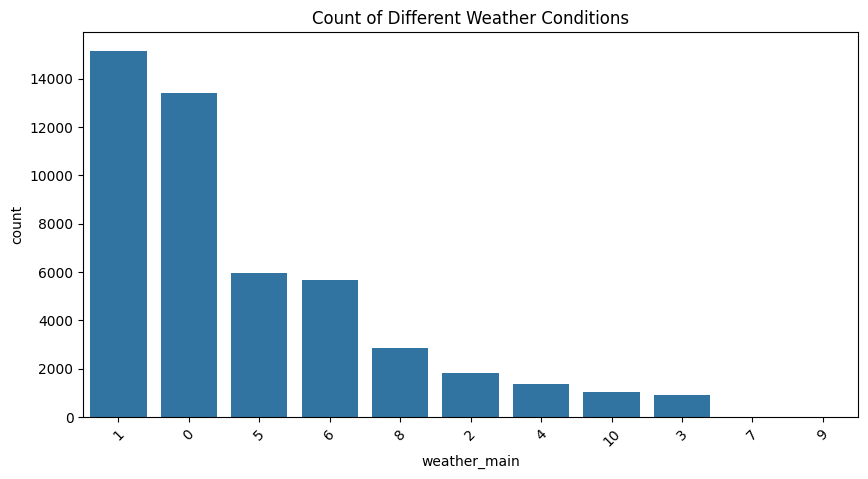

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='weather_main', order=df['weather_main'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count of Different Weather Conditions')
plt.show()

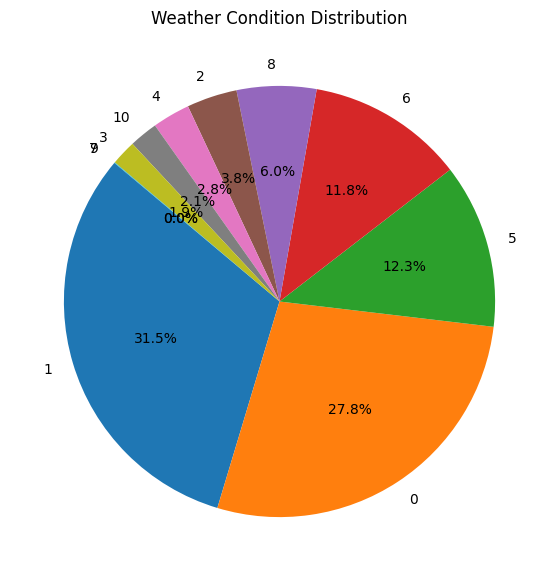

In [15]:
weather_counts = df['weather_main'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Weather Condition Distribution')
plt.show()

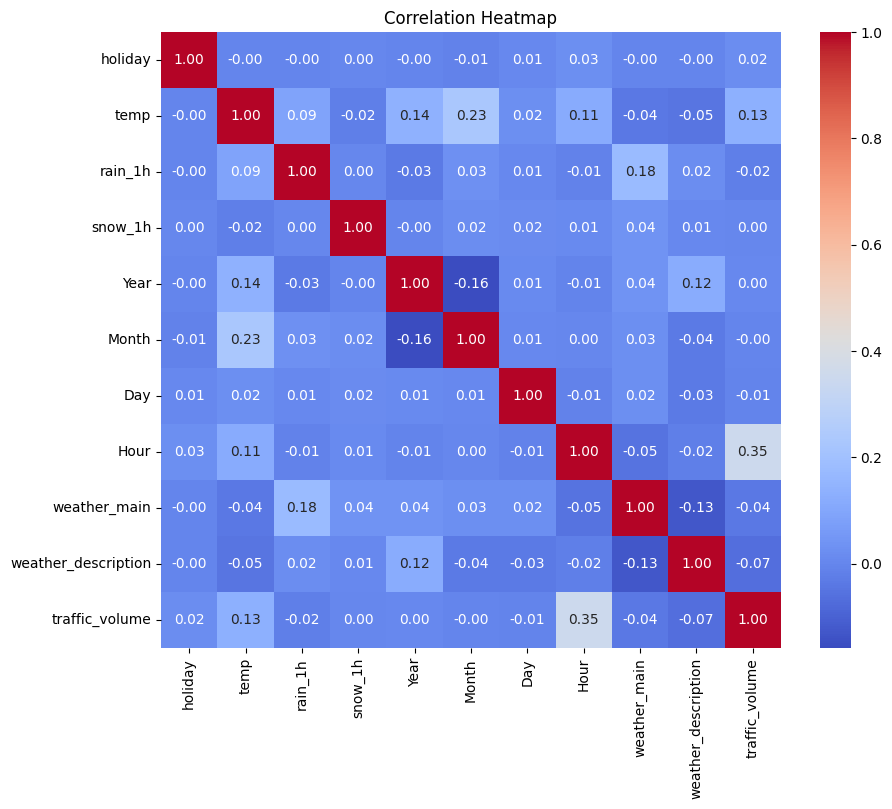

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

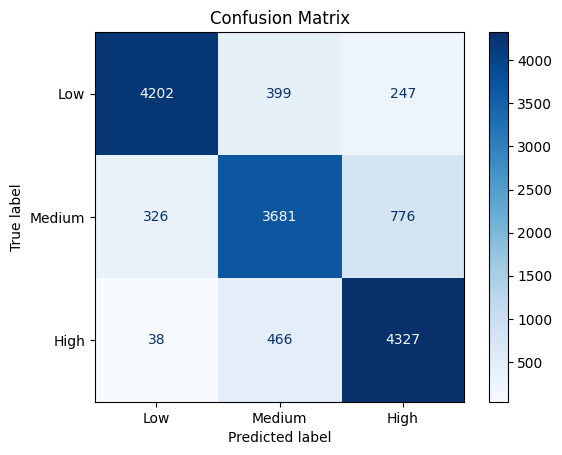

In [23]:
df['traffic_category'] = pd.qcut(df['traffic_volume'], q=3, labels=[0, 1, 2])
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
features = df.select_dtypes(include=np.number).drop(columns=['traffic_volume'])
X = features
y = df['traffic_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

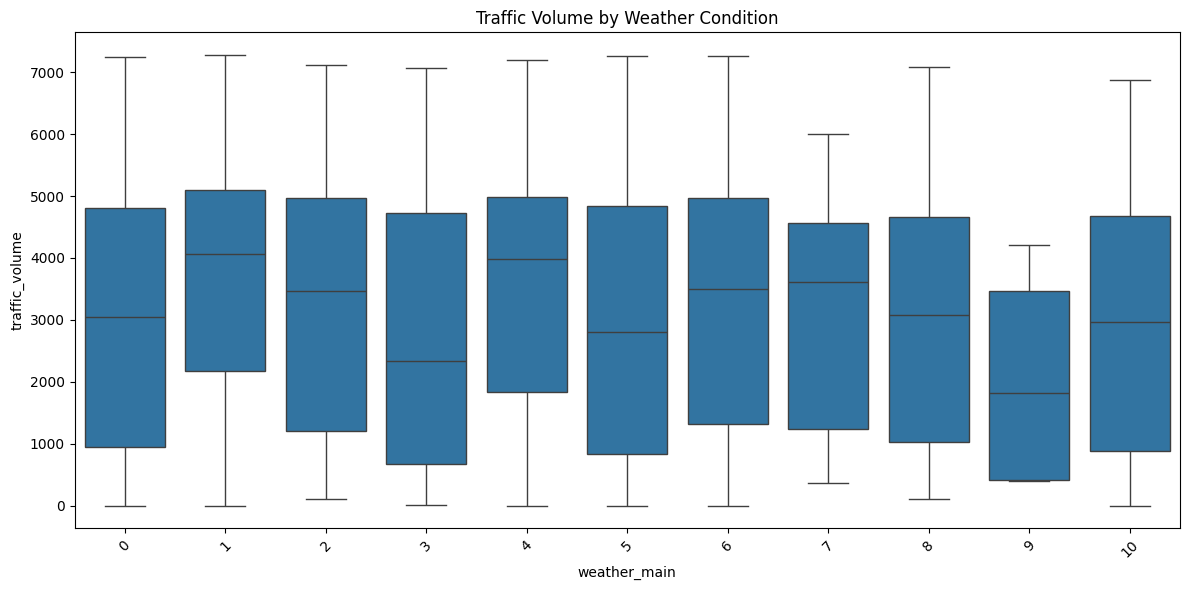

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df)
plt.xticks(rotation=45)
plt.title("Traffic Volume by Weather Condition")
plt.tight_layout()
plt.show()
